In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
ppl = pd.read_csv('../../ddf--entities--person.csv')

In [5]:
ppl

,person,name,age,gender,country,source,industry
0,a_jayson_adair,A. Jayson Adair,52.0,M,United States,damaged cars,Automotive
1,a_jerrold_perenchio,A. Jerrold Perenchio,91.0,M,United States,"Univision; television; television, Univision",Media; Media & Entertainment
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,67.0,M,United Arab Emirates,banking,Finance
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,52.0,M,Saudi Arabia,"retail, real estate",Fashion & Retail
4,abdul_rasyid,Abdul Rasyid,64.0,M,Indonesia,"timber, palm oil",Manufacturing
...,...,...,...,...,...,...,...
3939,ziyavudin_magomedov,Ziyavudin Magomedov,53.0,M,Russia,"port, gas",Energy
3940,zong_qinghou,Zong Qinghou; QInghou Zong,76.0,M,China,beverages; Beverages,Food & Beverage; Beverages; Food and Beverage
3941,zugen_ni,Zugen Ni,65.0,M,China,appliances,Manufacturing
3942,zuo_hui,Zuo Hui,51.0,M,China,real estate services,Real Estate


In [6]:
synonyms = pd.read_csv('../../../ddf--open_numbers/ddf--synonyms--geo.csv')

In [7]:
syn = synonyms.set_index('synonym')['geo'].to_dict()

In [8]:
# append one that not exists in dict
syn['Eswatini (Swaziland)'] = 'swz'

In [9]:
def _f(x):
    try:
        k = x.split(';')[0]
        return syn[k]
    except KeyError:
        print(x)
        return x

In [10]:
# Question: what to do if there are multiple countries?

In [11]:
ppl['geo'] = ppl['country'].map(_f)

In [12]:
!ls ../../

datapackage.json
datapackage.json.bak
ddf--concepts.csv
ddf--datapoints--annual_income--by--person--year.csv
ddf--datapoints--income_level--by--person--year.csv
ddf--datapoints--worth--by--person--year.csv
ddf--entities--person.csv
etl
README.md


In [13]:
# Question: what USD is it?

In [14]:
# assuming it's current USD

In [15]:
# TODOs:
# 1. create population by geo time income_group (income_group same as the groups in income mountain)
# 2. copy the new income mountain from the wealth report dataset
# 3. combain them

In [12]:
all_brackets = np.logspace(-7, 13, 51, endpoint=True, base=2)
brackets_delta = (13 - (-7)) / 50


def bracket_number_from_income(s, mountly=False, integer=True):
    if mountly:  # calculate daily income
        res = ((np.log2(s / 30) + 7) / brackets_delta)
    else:
        res = ((np.log2(s) + 7) / brackets_delta)
    if integer:
        return res.astype(int)
    return res

def bracket_number_from_income_c(s):
    res = ((np.log2(s) + 7) / brackets_delta)
    return res.astype(int)

def bracket_number_to_income(n):
    p = n * brackets_delta - 7
    return np.power(2, p)

In [13]:
income = pd.read_csv('../../ddf--datapoints--annual_income--by--person--year.csv')

In [14]:
income.year.unique()

array([2021, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2000,
       1999, 1997, 1998])

In [15]:
rates = [1.548,1.565,1.553,1.517,1.464,1.445,1.417,1.369,1.347,1.346,1.357,1.337,1.289,1.262,1.252,1.198,1.126,1.088,1.070,1.065,1.041,1.032,1.022,1.000,0.974,0.963,0.948,0.954,0.955,0.937,0.895,0.876,0.859,0.82,0.77]

In [16]:
years = list(range(1988, 2023))

In [17]:
rs = pd.Series(rates, index=years)

<AxesSubplot:>

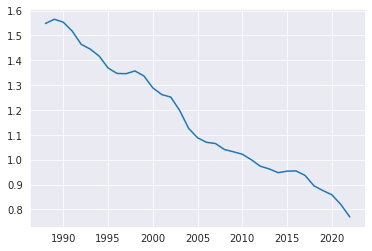

In [18]:
rs.plot()

In [19]:
rs.index.name = 'year'
rs.name = 'rate'

In [20]:
df = rs.reset_index()

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [22]:
X = rs.index.values
Y = rs.values
X = sm.add_constant(X)

model = sm.OLS(Y, X)
modelres = model.fit()

In [23]:
modelres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1494.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           4.61e-29
Time:                        10:31:46   Log-Likelihood:                 68.279
No. Observations:                  35   AIC:                            -132.6
Df Residuals:                      33   BIC:                            -129.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1156      1.189     39.635      0.000      44.697      49.534
x1            -0.0229      0.001    -38.658      0.000      -0.024      -0.022
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.984
Skew:                          -0.447   Prob(JB):                        0.371
Kurtosis:                       2.251   Cond. No.                     3.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
b, a = modelres.params

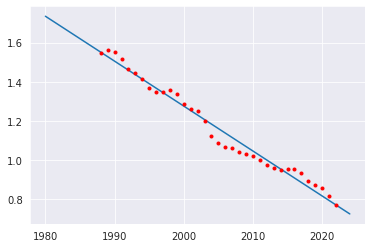

In [25]:
x = list(range(1980, 2025))

yp = [a * x_ + b for x_ in x]

plt.plot(x, yp)
plt.plot(df.year, df.rate, 'r.')

In [26]:
def get_inflation_rate(y):
    if y in rs.index:
        return rs.loc[y]
    else:
        return a * y + b

In [27]:
get_inflation_rate(2011)

1.0

In [28]:
# 1. convert person to geo
# 2. convert income to income group

person_to_geo = ppl.set_index('person')['geo'].to_dict()

df = income.copy()
df['geo'] = df['person'].map(lambda x: person_to_geo[x])

In [29]:
def annual_income_to_group(i, y):
    daily = i / 365.0
    daily_adjusted = get_inflation_rate(y) * daily
    return bracket_number_from_income(daily_adjusted)

def annual_income_to_group_c(i, y):
    daily = i / 365.0
    rates = [get_inflation_rate(y_) for y_ in y]
    daily_adjusted = rates * daily
    return bracket_number_from_income_c(daily_adjusted)

df['income_group'] = df.apply(lambda x: annual_income_to_group(x['annual_income'], x['year']), axis=1)

In [52]:
res = df.groupby(['geo', 'year', 'income_group'])['person'].count()

In [53]:
res.loc['usa', 2020]

income_group
57     32
58    159
59     88
60    112
61    116
62     83
63     49
64     34
65     19
66     11
67     10
68      3
69      6
70      4
71      3
72      7
74      2
Name: person, dtype: int64

In [54]:
# reindex to range() and fillna before continue

def reindex_income_group(ser):
    # print(ser)
    ser = ser.set_index('income_group')
    ser = ser.reindex(range(ser.index.min(), ser.index.max()+1)).fillna(0)
    return ser

In [55]:
res = res.reset_index()

In [56]:
res = res.groupby(['geo', 'year']).apply(reindex_income_group)['person']

In [59]:
res = res.sort_index().astype(int)

In [60]:
res.loc['usa', 2020]

income_group
57     32
58    159
59     88
60    112
61    116
62     83
63     49
64     34
65     19
66     11
67     10
68      3
69      6
70      4
71      3
72      7
73      0
74      2
Name: person, dtype: int64

In [61]:
df[df.person == 'jeff_bezos']

,person,year,annual_income,geo,income_group
17816,jeff_bezos,1998,4.943444e+09,usa,77
17817,jeff_bezos,1999,3.315630e+09,usa,76
17818,jeff_bezos,2000,1.687815e+09,usa,73
17819,jeff_bezos,2001,6.000000e+07,usa,61
17820,jeff_bezos,2002,4.500000e+07,usa,60
17821,jeff_bezos,2003,7.500000e+07,usa,62
17822,jeff_bezos,2004,1.530000e+08,usa,64
17823,jeff_bezos,2005,1.230000e+08,usa,63
17824,jeff_bezos,2006,1.290000e+08,usa,63
17825,jeff_bezos,2007,1.320000e+08,usa,63


In [62]:
ppl[ppl['person'].str.contains('bezos')]

,person,name,age,gender,country,source,industry,geo
1494,jeff_bezos,Jeff Bezos,58.0,M,United States,Amazon; Amazon.com,Technology,usa


In [63]:
res

geo  year  income_group
ago  2013  60              1
     2014  62              1
     2015  62              1
     2016  62              1
     2017  62              1
                          ..
zwe  2017  59              1
     2018  59              1
     2019  61              1
     2020  58              1
     2021  59              1
Name: person, Length: 12044, dtype: int64

In [ ]:
# now get estimation for past and future 

In [65]:
def get_model(X, Y):
    X = sm.add_constant(X)
    return sm.OLS(Y, X).fit()

def get_predict(model, X):
    a, b = model.params
    Yp = [b * x + a for x in X]
    return Yp

In [66]:
res2 = res.reset_index()

In [67]:
g = res2[res2['income_group'] == 77].set_index('year')['person'].copy()
g = g.reindex(pd.RangeIndex(1998, 2004))

In [68]:
# g.plot()
X = g.index.values
Y = g.fillna(0).values
yp = get_predict(get_model(X, Y), X)
g2 = g.fillna(pd.Series(yp, index=g.index))

<AxesSubplot:>

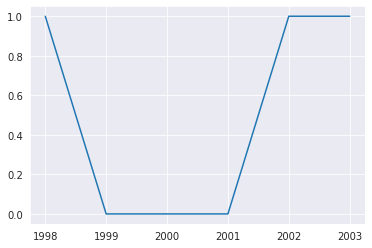

In [69]:
g2.plot()

In [70]:
res2.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2021, 1997])

In [71]:
def complete_time_series(ser):
    #print(ser)
    if ser.shape[0] == 1:
        # print("not enough data point")
        return np.round(ser)
    xmax = ser.index.max()
    xmin = ser.index.min()
    ser = ser.reindex(pd.RangeIndex(xmin, xmax+1))
    #print(ser)
    X = ser.index.values
    Y = ser.fillna(0).values
    xp = np.array(range(xmin-50, xmax+50))
    yp = get_predict(get_model(X, Y), xp)
    
    res = pd.Series(yp, index=xp)
    res.update(ser)
    res.index.name = 'year'
    res.name = 'person'
    res[res < 0] = 0
    return np.round(res)

In [72]:
res = complete_time_series(res2[res2['income_group'] == 77].set_index('year')['person'])

In [73]:
res.loc[2000:2010]

year
2000    0.0
2001    0.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
Name: person, dtype: float64

<AxesSubplot:xlabel='year'>

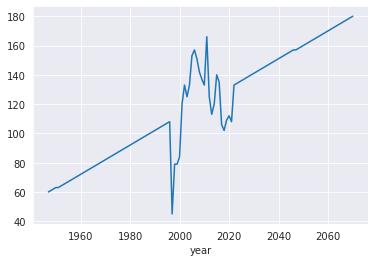

In [74]:
ser = res2[(res2['income_group'] == 60) & (res2['geo'] == 'usa')].set_index('year')['person']

complete_time_series(ser).plot()

In [75]:
usadf = res2[res2['geo'] == 'usa']

In [76]:
gs = usadf.groupby('income_group')

def run(df):
    # print(g)
    # print(df)
    return complete_time_series(df[['year', 'person']].set_index('year')['person']).reset_index()
    # res = res.assign(income_group=g).set_index('income_group', append=True)
    # return res

# res = gs.apply(run)

In [77]:
def run_geo(df):
    # print(df.head(1))
    return  df.groupby('income_group').apply(run).droplevel(1)
    # res.index.names = 

res = dict([(g, run_geo(df)) for g, df in res2.groupby('geo')])

In [78]:
res_ = []
for k, v in res.items():
    v_ = v.copy()
    v_['geo'] = k
    res_.append(v_)

In [79]:
res_ = pd.concat(res_)

In [80]:
res_ = res_.set_index(['geo', 'year'], append=True)

In [81]:
res_ = res_.reorder_levels([1, 2, 0])

In [82]:
res_ = res_.sort_index()

In [83]:
res_.loc['can', 1947]

,person
income_group,
59,0.0
60,2.0
61,24.0
62,11.0
63,2.0
64,8.0
65,0.0
66,3.0


In [84]:
res_.columns = ['population']

In [85]:
res_.to_csv('../../ddf--datapoints--population--by--geo--year--income_group.csv')

<AxesSubplot:xlabel='income_group'>

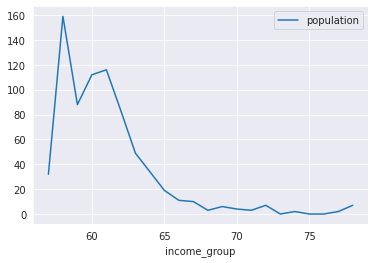

In [87]:
res_.loc['usa', 2020].plot()

In [88]:
im = pd.read_csv('../../../ddf--worldbank--povcalnet/income_mountain/ddf--datapoints--population--by--geo--time--income_bracket_50.csv')

In [89]:
im = im.set_index(['geo', 'time', 'income_bracket_50'])

In [90]:
wb = im.loc['usa', 2020].copy()

In [91]:
fb = res_.loc['usa', 2020].copy()

In [92]:
fb

,population
income_group,
57,32.0
58,159.0
59,88.0
60,112.0
61,116.0
62,83.0
63,49.0
64,34.0
65,19.0


In [93]:
wb.index.name = 'income_group'
fb.index.name = 'income_group'

com = pd.concat([wb, fb])

In [94]:
com = com.reindex(range(0, 79)).interpolate('slinear')

In [95]:
plt.rcParams['figure.figsize'] = [10, 8]

<AxesSubplot:xlabel='income_group'>

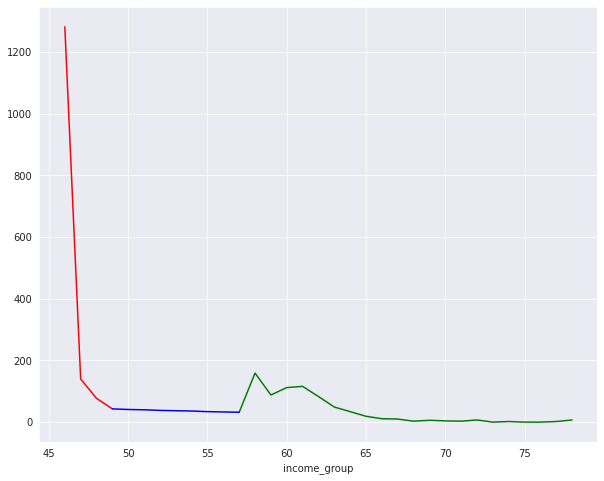

In [96]:
wb[46:]['population'].plot(color='r')
fb['population'].plot(color='g')

com[49:58]['population'].astype(int).plot(color='b')

In [368]:
res_.index.get_level_values('geo').unique()

Index(['ago', 'are', 'arg', 'aus', 'aut', 'bel', 'blz', 'bra', 'brb', 'can',
       'che', 'chl', 'chn', 'col', 'cyp', 'cze', 'deu', 'dnk', 'dza', 'egy',
       'esp', 'est', 'fin', 'fra', 'gbg', 'gbr', 'geo', 'grc', 'gtm', 'hkg',
       'hun', 'idn', 'ind', 'irl', 'isl', 'isr', 'ita', 'jpn', 'kaz', 'kna',
       'kor', 'kwt', 'lbn', 'lie', 'ltu', 'mac', 'mar', 'mco', 'mex', 'mys',
       'nga', 'nld', 'nor', 'npl', 'nzl', 'omn', 'pak', 'per', 'phl', 'pol',
       'prt', 'qat', 'rou', 'rus', 'sau', 'sgp', 'svk', 'swe', 'swz', 'tha',
       'tur', 'twn', 'tza', 'uga', 'ukr', 'usa', 'ven', 'vnm', 'zaf', 'zwe'],
      dtype='object', name='geo')

In [97]:
import sys
sys.path.insert(0, '../scripts')

In [98]:
%load_ext autoreload

In [99]:
%autoreload 1

In [100]:
%aimport smoothlib

In [101]:
import smoothlib

In [102]:
from scipy.signal import savgol_filter
import statsmodels.api as sm

In [229]:
# we don't want to underestimate the millionaires! so, overestimate it!

In [384]:
!pwd

/home/semio/src/work/gapminder/datasets/repo/github.com/open-numbers/ddf--gapminder--forbes_billionaires/etl/notebooks


In [161]:
def create_shape(wb, fb):
    # remove some wb's tailing datapoint which are lower than
    # the maximum of fb's datapoint
    # and also the head of fb's datapoints which are lower than the maximum
    fb_input = fb['population'].copy()
    wb_input = wb['population'].copy()
    fb_max = fb_input.max()
    for i, v in wb_input.iloc[::-1].iteritems():
        if v > fb_max:
            break        
    wb_input = wb_input.loc[:i]
    idmax = fb_input.idxmax()       
    fb_input = fb_input.loc[idmax:]
    fb_idx_max = fb.index.max()
    
    # inteoplate values. pchip is good at creating curves
    com = pd.concat([wb_input, fb_input])
    com = com.reindex(range(0, fb_idx_max+1))
    com = com.interpolate('pchip')
    
    # smoothing
    begin_idx = i - 5
    ser = com[begin_idx:].copy()
    ser_max = ser.max()
    ser_input = ser / ser_max
    # ser.loc[ser == 0] = 1
    # ser_input = np.log(ser)
    # print(ser)
    # print(ser_input)
    # MAYBE: use log version. But it's not working on first try.
    
    ser_new = smoothlib.run_smooth(ser_input, 8, 0)
    ser_new = smoothlib.run_smooth(ser_new, 5, 0)
    ser_new = smoothlib.run_smooth(ser_new, 3, 0)
    # ser_new = smoothlib.run_smooth(ser_new, 3, 0)
    ser_new = np.round(ser_new * ser_max)
    # print(ser_new)
    # ser_new = np.round(np.exp(ser_new))
    
#     print(begin_idx)
#     print(wb_input.loc[:begin_idx].tail())
#     print(ser_new.head())
    res = pd.concat([wb_input.loc[:begin_idx-1], ser_new])
    return res

In [154]:
geo, time = ['can', 2020]
fb = res_.loc[geo, time].copy()
wb = im.loc[geo, time].copy()

In [155]:
wb.index.name = 'income_group'
fb.index.name = 'income_group'

In [156]:
res_shape = create_shape(wb, fb)

income_group
38    121092.0
39     57863.0
40     26940.0
41      9122.0
42      1671.0
43       122.0
44       105.0
45        90.0
46        77.0
47        68.0
48        60.0
49        53.0
50        48.0
51        44.0
52        40.0
53        37.0
54        33.0
55        29.0
56        26.0
57        22.0
58        18.0
59        15.0
60        12.0
61         9.0
62         7.0
63         5.0
64         4.0
65         3.0
66         2.0
67         1.0
68         1.0
69         0.0
70         0.0
dtype: float64


<AxesSubplot:xlabel='income_group'>

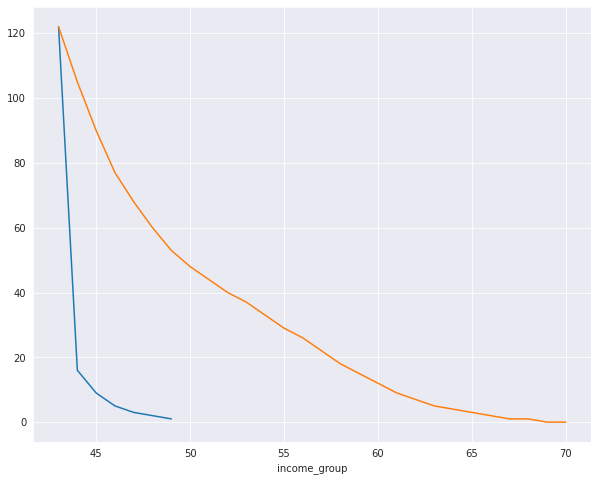

In [160]:
k = 43
wb['population'].loc[k:].plot()
res_shape.loc[k:].plot()

In [162]:
res_shape.loc[k:]

income_group
43    122.0
44    105.0
45     90.0
46     77.0
47     68.0
48     60.0
49     53.0
50     48.0
51     44.0
52     40.0
53     37.0
54     33.0
55     29.0
56     26.0
57     22.0
58     18.0
59     15.0
60     12.0
61      9.0
62      7.0
63      5.0
64      4.0
65      3.0
66      2.0
67      1.0
68      1.0
69      0.0
70      0.0
dtype: float64

In [169]:
im.index.names = ['geo', 'year', 'income_group']

In [171]:
im

population
geo year income_group            
afg 1800 0                     35
         1                     56
         2                     92
         3                    154
         4                    266
...                           ...
zwe 2050 45                   443
         46                   255
         47                   139
         48                    71
         49                    34

[2447250 rows x 1 columns]

In [168]:
res_

population
geo year income_group            
ago 1963 60                   0.0
    1964 60                   0.0
         62                   1.0
    1965 60                   0.0
         62                   1.0
...                           ...
zwe 2067 61                   0.0
    2068 59                   0.0
         61                   0.0
    2069 59                   0.0
    2070 59                   0.0

[85380 rows x 1 columns]

In [174]:
im2 = im.reset_index(level=[2])
res_2 = res_.reset_index(level=[2])

In [176]:
both_idx = im2.index.intersection(res_2.index)

In [195]:
both_idx

MultiIndex([('ago', 1963),
            ('ago', 1964),
            ('ago', 1965),
            ('ago', 1966),
            ('ago', 1967),
            ('ago', 1968),
            ('ago', 1969),
            ('ago', 1970),
            ('ago', 1971),
            ('ago', 1972),
            ...
            ('zwe', 2041),
            ('zwe', 2042),
            ('zwe', 2043),
            ('zwe', 2044),
            ('zwe', 2045),
            ('zwe', 2046),
            ('zwe', 2047),
            ('zwe', 2048),
            ('zwe', 2049),
            ('zwe', 2050)],
           names=['geo', 'year'], length=7711)

In [177]:
both_idx[0]

('ago', 1963)

In [194]:
both_idx.unique()

MultiIndex([('ago', 1963),
            ('ago', 1964),
            ('ago', 1965),
            ('ago', 1966),
            ('ago', 1967),
            ('ago', 1968),
            ('ago', 1969),
            ('ago', 1970),
            ('ago', 1971),
            ('ago', 1972),
            ...
            ('zwe', 2041),
            ('zwe', 2042),
            ('zwe', 2043),
            ('zwe', 2044),
            ('zwe', 2045),
            ('zwe', 2046),
            ('zwe', 2047),
            ('zwe', 2048),
            ('zwe', 2049),
            ('zwe', 2050)],
           names=['geo', 'year'], length=7711)

In [196]:
# do create shape for all geo time

res = []

for idx in both_idx:
    geo, time = idx
    wb = im.loc[geo, time, :].copy()
    fb = res_.loc[geo, time, :].copy()
    res_shape = create_shape(wb, fb)
    res_shape.name = 'population'
    res_shape = res_shape.to_frame()
    res_shape['geo'] = geo
    res_shape['time'] = time
    res_shape = res_shape.set_index(['geo', 'time'], append=True)
    res.append(res_shape)

In [198]:
res = pd.concat(res)

In [201]:
res = res.reorder_levels([1, 2, 0])

In [202]:
res

population
geo time income_group            
ago 1963 0                    0.0
         1                   41.0
         2                  254.0
         3                  462.0
         4                  791.0
...                           ...
zwe 2050 58                   4.0
         59                   3.0
         60                   2.0
         61                   1.0
         62                   0.0

[519204 rows x 1 columns]

In [209]:
wb_other = im2.loc[~im2.index.isin(both_idx)].set_index('income_group', append=True)

In [214]:
wb_other.index.names = ['geo', 'time', 'income_group']

In [215]:
res_all = pd.concat([wb_other, res])

In [211]:
res.index.intersection(wb_other.index)

MultiIndex([], names=['geo', None, 'income_group'])

In [212]:
res.index.names

FrozenList(['geo', 'time', 'income_group'])

In [213]:
wb_other.index.names

FrozenList(['geo', 'year', 'income_group'])

In [216]:
res_all = res_all.sort_index()

In [218]:
res_all['population'] = res_all['population'].astype(int)

In [219]:
res_all

population
geo time income_group            
afg 1800 0                     35
         1                     56
         2                     92
         3                    154
         4                    266
...                           ...
zwe 2050 58                     4
         59                     3
         60                     2
         61                     1
         62                     0

[2580904 rows x 1 columns]

In [233]:
res_all.loc['usa', 2020, 46:]

population
geo time income_group            
usa 2020 46                  1282
         47                  1065
         48                   876
         49                   727
         50                   612
         51                   530
         52                   463
         53                   409
         54                   363
         55                   316
         56                   267
         57                   222
         58                   182
         59                   150
         60                   123
         61                    99
         62                    79
         63                    62
         64                    49
         65                    37
         66                    27
         67                    19
         68                    13
         69                     9
         70                     7
         71                     5
         72                     4
         73                     4
         74                     3
         75                     2
         76                     2
         77                     2
         78                     1

<AxesSubplot:xlabel='geo,time,income_group'>

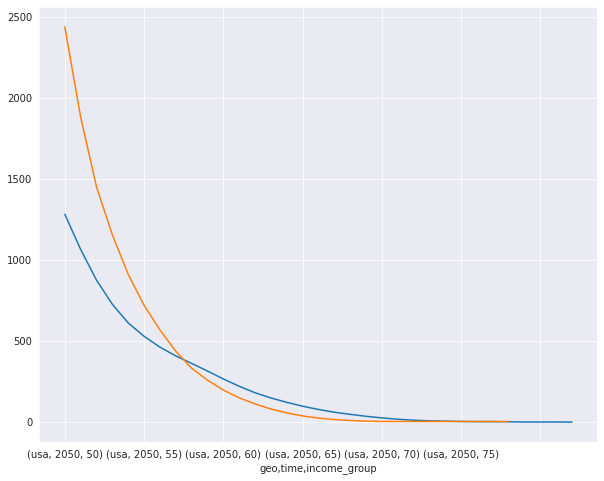

In [231]:
res_all.loc['usa', 2020, 46:]['population'].plot()
res_all.loc['usa', 2050, 50:]['population'].plot()  # room for imporvment?

In [234]:
res_all.to_csv('../../ddf--datapoints--population--by--geo--time--income_group.csv')

In [235]:
# create income mountain

In [239]:
im_all = res_all.unstack()

In [240]:
im_all = im_all.fillna(0)

In [241]:
im_all

population                                                  \
income_group         0     1     2      3      4      5      6       7    
geo time                                                                  
afg 1800           35.0  56.0  92.0  154.0  266.0  487.0  929.0  1852.0   
    1801           35.0  56.0  92.0  154.0  266.0  487.0  929.0  1852.0   
    1802           35.0  56.0  92.0  154.0  266.0  487.0  929.0  1852.0   
    1803           35.0  56.0  92.0  154.0  266.0  487.0  929.0  1852.0   
    1804           35.0  56.0  92.0  154.0  266.0  487.0  929.0  1852.0   
...                 ...   ...   ...    ...    ...    ...    ...     ...   
zwe 2046            0.0   0.0   8.0   99.0  208.0  352.0  557.0   859.0   
    2047            0.0   0.0   6.0   94.0  209.0  356.0  565.0   870.0   
    2048            0.0   0.0   6.0   90.0  212.0  361.0  573.0   880.0   
    2049            0.0   0.0   6.0   83.0  213.0  364.0  578.0   888.0   
    2050            0.0   2.0  12.0   89.0  233.0  397.0  627.0   960.0   

                              ...                                          \
income_group      8       9   ...   70   71   72   73   74   75   76   77   
geo time                      ...                                           
afg 1800      3858.0  8412.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    1801      3858.0  8412.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    1802      3858.0  8412.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    1803      3858.0  8412.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    1804      3858.0  8412.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...              ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
zwe 2046      1351.0  2213.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    2047      1367.0  2219.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    2048      1377.0  2221.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    2049      1388.0  2230.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
    2050      1489.0  2365.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                        
income_group   78   79  
geo time                
afg 1800      0.0  0.0  
    1801      0.0  0.0  
    1802      0.0  0.0  
    1803      0.0  0.0  
    1804      0.0  0.0  
...           ...  ...  
zwe 2046      0.0  0.0  
    2047      0.0  0.0  
    2048      0.0  0.0  
    2049      0.0  0.0  
    2050      0.0  0.0  

[48945 rows x 80 columns]

In [245]:
res = []

for i, row in im_all.iterrows():
    line = ','.join(row.loc['population'].astype(int).astype(str).values)
    res.append(line)

In [246]:
res_lines = pd.Series(res, index=im_all.index)

In [251]:
res_lines.name = 'income_mountain_79bracket_shape_for_log'

In [249]:
res_lines.index.names = ['country', 'time']

In [252]:
res_lines

country  time
afg      1800    35,56,92,154,266,487,929,1852,3858,8412,19000,...
         1801    35,56,92,154,266,487,929,1852,3858,8412,19000,...
         1802    35,56,92,154,266,487,929,1852,3858,8412,19000,...
         1803    35,56,92,154,266,487,929,1852,3858,8412,19000,...
         1804    35,56,92,154,266,487,929,1852,3858,8412,19000,...
                                       ...                        
zwe      2046    0,0,8,99,208,352,557,859,1351,2213,3936,7614,1...
         2047    0,0,6,94,209,356,565,870,1367,2219,3908,7452,1...
         2048    0,0,6,90,212,361,573,880,1377,2221,3878,7311,1...
         2049    0,0,6,83,213,364,578,888,1388,2230,3863,7202,1...
         2050    0,2,12,89,233,397,627,960,1489,2365,4027,7335,...
Name: income_mountain_79bracket_shapefor_log, Length: 48945, dtype: object

In [254]:
res_lines.to_csv('../../../ddf--worldbank--povcalnet/income_mountain/ddf--datapoints--income_mountain_79bracket_shape_for_log--by--country--time.csv')

In [639]:
fb_max = fb['population'].max()
fb_max

8.0

In [640]:
wb_input = wb['population'].copy()

for i, v in wb_input.iloc[::-1].iteritems():
    if v > fb_max:
        break
        
wb_input = wb_input.loc[:i]

In [641]:
fb_input = fb['population'].copy()
idmax = fb_input.idxmax()
        
fb_input = fb_input.loc[idmax:]

In [642]:
fb_input

income_group
58    8.0
59    8.0
60    3.0
61    5.0
62    1.0
63    4.0
64    1.0
65    2.0
66    1.0
67    1.0
68    0.0
69    1.0
70    1.0
Name: population, dtype: float64

In [643]:
fb_idx_max = fb.index.max()

In [644]:
com = pd.concat([wb_input, fb_input])
com = com.reindex(range(0, fb_idx_max+1))

In [645]:
com = com.interpolate('pchip')

<AxesSubplot:xlabel='income_group'>

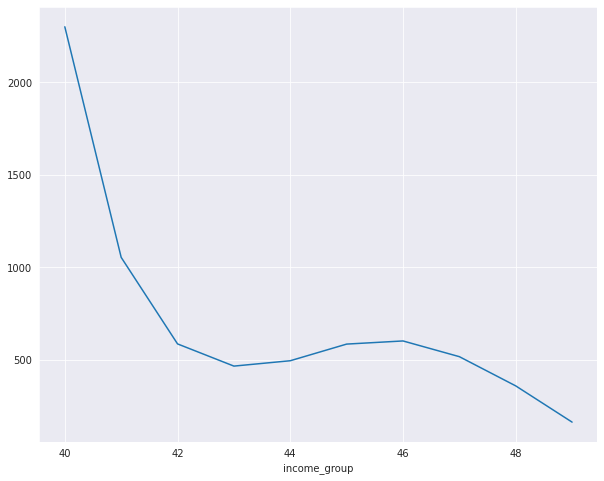

In [648]:
# com[40:].plot()
wb['population'][40:].plot()

In [438]:
ser_input

income_group
40    1.000000
41    0.510051
42    0.263119
43    0.137325
44    0.069710
45    0.036934
46    0.018493
47    0.009363
48    0.004401
49    0.002052
50    0.001693
51    0.001395
52    0.001151
53    0.000954
54    0.000796
55    0.000669
56    0.000567
57    0.000481
58    0.000405
59    0.000331
60    0.000251
61    0.000159
62    0.000074
63    0.000042
64    0.000021
65    0.000042
66    0.000011
67    0.000032
68    0.000011
69    0.000000
70    0.000011
Name: population, dtype: float64

In [480]:
smoothlib.get_sample_at_point(42, ser_input, 1, 0, 2)

income_group
40    1.000000
41    0.510051
42    0.263119
43    0.137325
44    0.069710
Name: population, dtype: float64

In [502]:
smoothlib.mval_at_point(46, ser)

0.8064516129032258 0.9815065594583157
1.5853739778575626


1

In [485]:
ser

income_group
40    94520.000000
41    48210.000000
42    24870.000000
43    12980.000000
44     6589.000000
45     3491.000000
46     1748.000000
47      885.000000
48      416.000000
49      194.000000
50      160.035281
51      131.876352
52      108.820461
53       90.164855
54       75.206783
55       63.243491
56       53.572227
57       45.490239
58       38.294775
59       31.283082
60       23.752408
61       15.000000
62        7.000000
63        4.000000
64        2.000000
65        4.000000
66        1.000000
67        3.000000
68        1.000000
69        0.000000
70        1.000000
Name: population, dtype: float64

In [486]:
45.49 / 94520.000000

0.0004812738044858231

In [600]:
ser = com[40:].copy()
ser_max = ser.max()
ser_input = ser / ser_max
# lowess = sm.nonparametric.lowess(ser.values, ser.index.values, frac=0.22)
# plt.plot(lowess[6:, 0],  lowess[6:, 1])
ser_new = smoothlib.run_smooth(ser_input, 5, 0)
# ser_new = smoothlib.run_smooth(ser_new, 5, 0)

# print(ser_new)
ser_new = ser_new * ser_max
ser_new.index = ser_new.index + 40
# ser_new.plot()
# com[40:].plot()
# fb_input.plot()
# wb_input[46:].plot()

In [649]:
com[40:]

income_group
40    2301.000000
41    1054.000000
42     586.000000
43     466.000000
44     495.000000
45     585.000000
46     602.000000
47     517.000000
48     359.000000
49     163.000000
50     125.462990
51      94.099771
52      68.441017
53      48.017403
54      32.359601
55      20.998286
56      13.464132
57       9.287812
58       8.000000
59       8.000000
60       3.000000
61       5.000000
62       1.000000
63       4.000000
64       1.000000
65       2.000000
66       1.000000
67       1.000000
68       0.000000
69       1.000000
70       1.000000
Name: population, dtype: float64

In [650]:
ser_new

40    834600.000000
41    474088.000000
42    281298.000000
43    148877.000000
44     58727.000000
45     13964.000000
46      1282.000000
47      1049.633540
48       863.038298
49       716.052897
50       611.611657
51       523.308017
52       456.130088
53       403.916493
54       360.505857
55       319.736802
56       275.447951
57       221.477929
58       157.919593
59       119.666667
60       111.600000
61        89.600000
62        78.800000
63        60.200000
64        39.200000
65        24.600000
66        15.400000
67         9.800000
68         6.800000
69         5.200000
70         4.857143
71         3.714286
72         3.285714
73         2.428571
74         2.142857
75         1.857143
76         1.214286
77         0.571429
78         0.000000
dtype: float64

<AxesSubplot:>

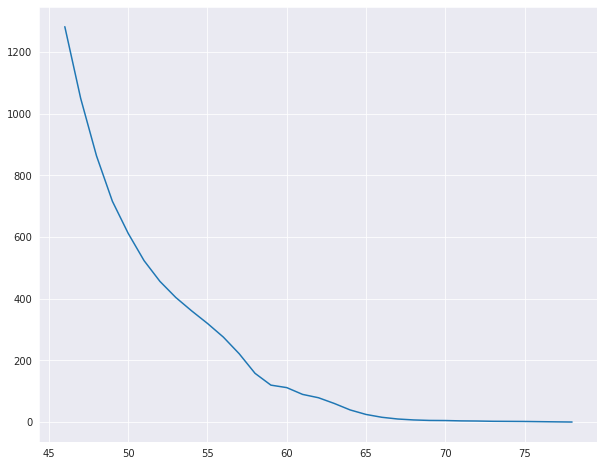

In [606]:
# print(ser_new)
# ser_new = ser_new * ser_max
# ser_new.index = ser_new.index + 40
ser_new.loc[46:].plot()
# wb_input.loc[46:].plot(color='r')
# com[46:].plot()

In [605]:
(np.round(ser_new, 0) - com[40:]).sum()

45.39985694315453

In [597]:
com[40:]

income_group
40    834600.000000
41    474088.000000
42    281298.000000
43    148877.000000
44     58727.000000
45     13964.000000
46      1282.000000
47      1049.633540
48       863.038298
49       716.052897
50       602.515961
51       516.266113
52       451.141976
53       400.982174
54       359.625329
55       320.910067
56       278.675008
57       226.758778
58       159.000000
59        88.000000
60       112.000000
61       116.000000
62        83.000000
63        49.000000
64        34.000000
65        19.000000
66        11.000000
67        10.000000
68         3.000000
69         6.000000
70         4.000000
71         3.000000
72         7.000000
73         1.000000
74         2.000000
75         0.000000
76         0.000000
77         2.000000
78         1.000000
Name: population, dtype: float64

In [436]:
ser.idxmax()

40

In [437]:
len(ser)

31

In [359]:
wb['population'][46:].sum()

3243

In [360]:
com[46:].sum()

4386.739953311917

In [361]:
lowess

array([[4.00000000e+01, 9.45200000e+04],
       [4.10000000e+01, 4.82100000e+04],
       [4.20000000e+01, 2.48700000e+04],
       [4.30000000e+01, 1.29800000e+04],
       [4.40000000e+01, 6.58900000e+03],
       [4.50000000e+01, 3.49100000e+03],
       [4.60000000e+01, 1.74800000e+03],
       [4.70000000e+01, 8.85000000e+02],
       [4.80000000e+01, 4.16000000e+02],
       [4.90000000e+01, 1.94000000e+02],
       [5.00000000e+01, 1.46131672e+02],
       [5.10000000e+01, 1.25991465e+02],
       [5.20000000e+01, 1.07795776e+02],
       [5.30000000e+01, 9.19754149e+01],
       [5.40000000e+01, 7.81869051e+01],
       [5.50000000e+01, 6.59772755e+01],
       [5.60000000e+01, 5.54155114e+01],
       [5.70000000e+01, 4.65011266e+01],
       [5.80000000e+01, 3.85032467e+01],
       [5.90000000e+01, 3.08015050e+01],
       [6.00000000e+01, 2.32803099e+01],
       [6.10000000e+01, 1.64079605e+01],
       [6.20000000e+01, 1.07490203e+01],
       [6.30000000e+01, 6.61559643e+00],
       [6.400000

In [ ]:
ser_new

In [ ]:
# below are ways I have tried. not working...

In [214]:
ser = com[40:]['population'].copy()

In [215]:
lowess = sm.nonparametric.lowess(ser.values, ser.index.values, frac=0.22)

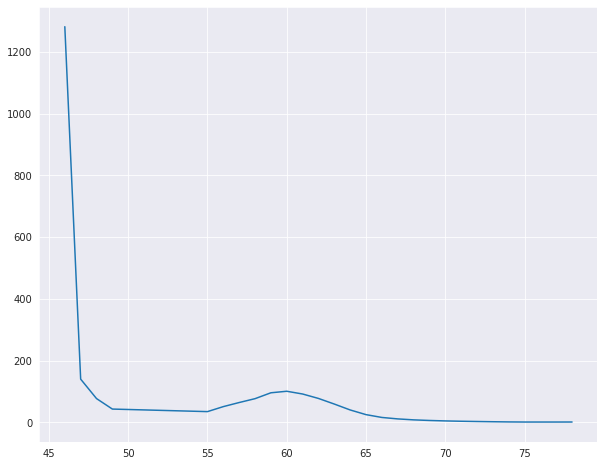

In [218]:
plt.plot(lowess[6:, 0],  lowess[6:, 1])

<AxesSubplot:xlabel='income_group'>

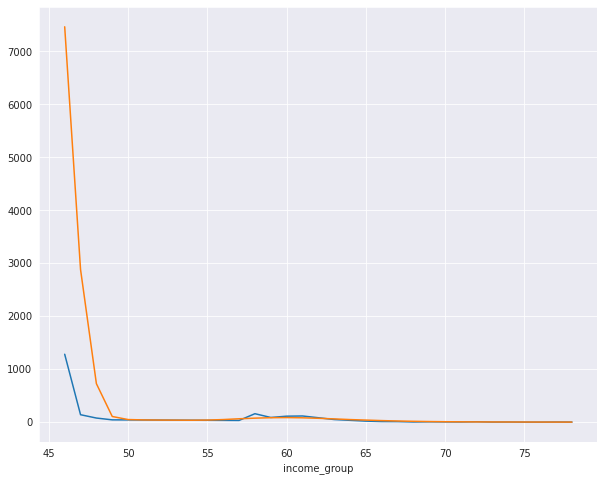

In [226]:
ser = com['population'].copy()
ser_max = ser.max()
# ser = ser / ser_max
ser_smooth = smoothlib.run_smooth(ser / ser_max, 3, 0)
ser_smooth = smoothlib.run_smooth(ser_smooth, 3, 0)
ser_smooth = smoothlib.run_smooth(ser_smooth, 3, 0)
ser_smooth = ser_smooth * ser_max

ser[46:].plot()
ser_smooth[46:].plot()

<AxesSubplot:xlabel='income_group'>

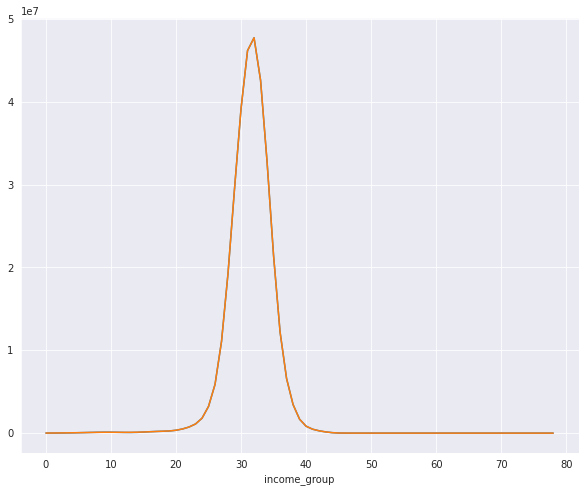

In [227]:
ser.plot()
ser_smooth.plot()

<AxesSubplot:>

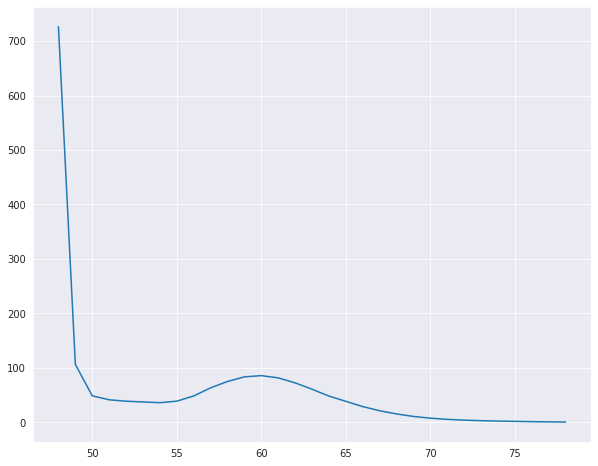

In [228]:
ser_smooth[48:].plot()

In [186]:
ser.rolling(8).mean().loc[46:].shift(-8)

income_group
46    56.796875
47    43.640625
48    38.187500
49    36.812500
50    51.484375
51    57.453125
52    66.593750
53    76.406250
54    82.265625
55    84.046875
56    84.125000
57    82.500000
58    64.000000
59    54.250000
60    40.625000
61    26.875000
62    17.000000
63    11.250000
64     7.875000
65     5.625000
66     4.500000
67     3.250000
68     2.875000
69     2.375000
70     2.000000
71          NaN
72          NaN
73          NaN
74          NaN
75          NaN
76          NaN
77          NaN
78          NaN
Name: population, dtype: float64

<AxesSubplot:xlabel='income_group'>

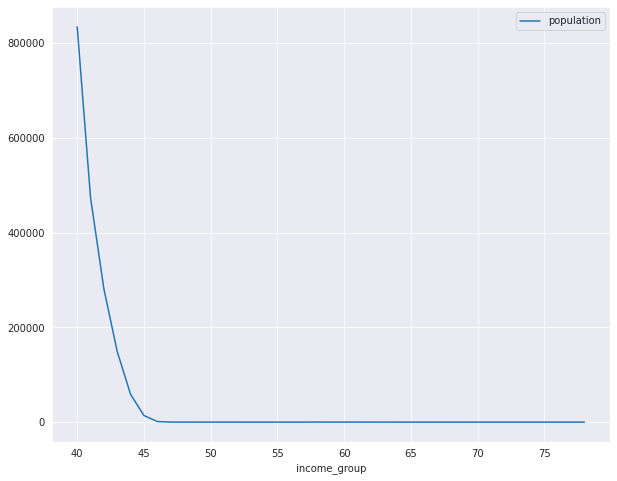

In [168]:
com[40:].plot()

In [144]:
wb.iloc[-1]

population    121
Name: 49, dtype: int64

In [145]:
fb.iloc[1]

population    75.0
Name: 58, dtype: float64

In [149]:
com[49:59]

income_group
49    121.000
50    113.125
51    105.250
52     97.375
53     89.500
54     81.625
55     73.750
56     65.875
57     58.000
58     75.000
Name: population, dtype: float64

In [ ]:
# Next: create shapes for all country and save it as datapoint file.
# so that we have population by income group for all 3 datasets.